In [1]:
%matplotlib qt5
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mpd
import numpy as np

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as off

import IPython.display as disp

In [2]:
%matplotlib inline

off.init_notebook_mode(connected=True)

# Tut 07 - Ableitungen



*Jochen Illerhaus - jochen.illerhaus@student.kit.edu*

# Orga

<ul style="font-size: 30pt; line-height: 1.5;">
<li><a href="http://bit.ly/2HayX3w">http://bit.ly/2HayX3w</a></li>
<li>jochen.illerhaus@student.kit.edu</li>
</ul>

<center>
<span style="font-size: 40pt; line-height: 100px;">
Fragen
</span>
</center>

In [59]:
def data_gen(func, limits):
    X = np.linspace(-1, 1, 400)
    Y = np.linspace(-1, 1, 400)

    x, y = np.meshgrid(X, Y)

    f = func(x, y)
    
    if limits is not None:
        f[np.where(f < limits[0])] = limits[0]
        f[np.where(f > limits[1])] = limits[1] 
    
    return x, y, f


def plot(func, gradient, title="", limits=None):
    x, y, f = data_gen(func, limits)
    
    fig = plt.figure(figsize=(15,6))
    
    fig.suptitle(title, fontsize=20)
    
    axa = fig.add_subplot(121)
    im = axa.imshow(f, extent=[-1,1, -1,1])
    
    s = 40
    X, Y = x[::s, ::s], y[::s, ::s]
    U, V = gradient(X, Y)
    axa.quiver(X, Y, U, V)
    
    axa.set_xlabel("$x$")
    axa.set_ylabel("$y$")
    
    fig.colorbar(im, ax=axa)
    
    axb = fig.add_subplot(122, projection='3d')
    axb.plot_wireframe(x, y, f) 
    
    axb.set_xlabel("$x$")
    axb.set_ylabel("$y$")
    axb.set_zlabel("$f(x, y)$")
    
    return fig

In [7]:
def pyplot(func, filename=None, limits=None):
    x, y, f = data_gen(func, limits)

    surface = go.Surface(x=x, y=y, z=f)
    data = [surface]

    layout = go.Layout(
        #title=title,
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    if filename is None:
        return off.iplot(fig)
    else:
        return off.plot(fig, filename=filename)

# HM2 Blatt 6 Aufgabe 1

Bestimmen Sie fur die folgenden Funktionen die partiellen Ableitungen.
 * **b)** $\;\;f : \mathbb{R}^2 \to \mathbb{R}\;,\;\; (x,\,y) \mapsto \big(x^2 + y^2\big)\,e^{xy}$
 
Berechnen Sie auch die partiellen Ableitungen der partiellen Ableitungen. Ermitteln Sie
zusätzlich in **b)** die Richtungsableitung $\frac{\partial f}{\partial v}$ von $f$ in Richtung $v := \big(1,\,1\big)$.

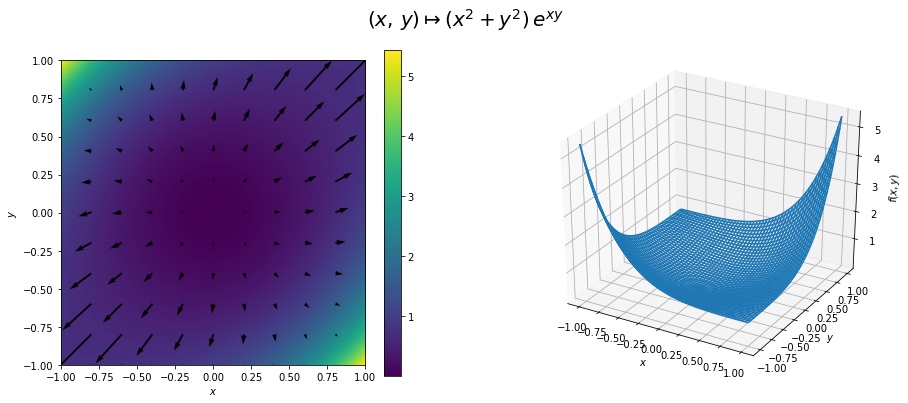

In [61]:
f = lambda x, y: (x**2 + y**2)*np.exp(x*y)
g = lambda x, y: ((x**2*y + 2*x + y**3)*np.exp(x*y), (x**3 + 2*y + y**2*x)*np.exp(x*y))
plot(f, g, title="$(x,\,y) \mapsto (x^2 + y^2)\,e^{xy}$");

In [8]:
pyplot(f, filename="1b.html")

disp.display(disp.HTML("<a style='font-size: 40pt' href='1b.html' target='_blank'>Plot</a>"))

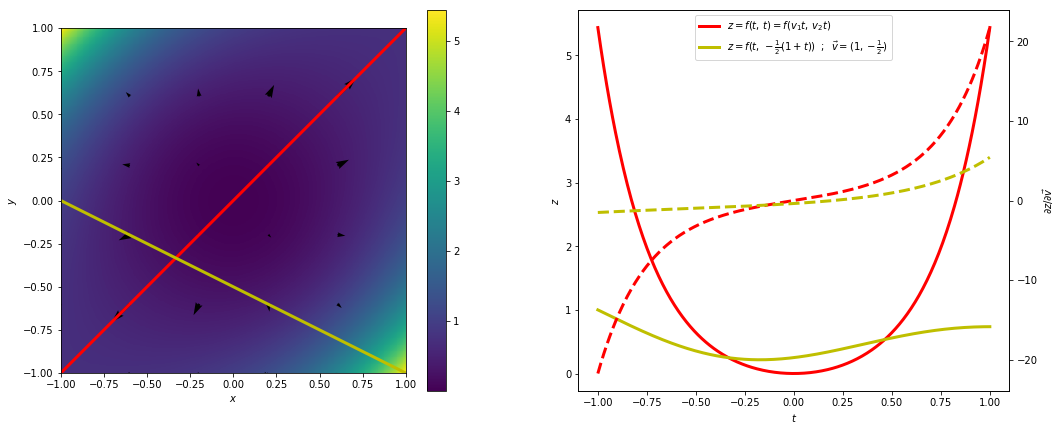

In [84]:
x, y = np.meshgrid(np.linspace(-1, 1, 400), np.linspace(-1, 1, 400))
z = f(x, y)
u, v = g(x, y)
fig, (axa, axb) = plt.subplots(1, 2, figsize=(17, 7))
fig.colorbar(axa.imshow(z, extent=[-1,1, -1,1]), ax=axa)
axa.set_xlabel("$x$")
axa.set_ylabel("$y$")
s = 80
axa.quiver(x[::s, ::s], y[::s, ::s], u[::s, ::s], v[::s, ::s])
axa.plot([-1, 1], [-1, 1], 'r', linewidth=3)
axa.plot([-1,1], [0, -1], 'y', linewidth=3)
t = np.linspace(-1, 1, 400)
h = lambda x, y, v: sum([V*U for V, U in zip(v, g(x, y))])
axc = axb.twinx()
axb.plot(t, f(t, t), 'r', linewidth=3, label="$z = f(t, \\, t) = f(v_1 t, \\, v_2 t)$")
axc.plot(t, h(t, t, (1,1)), '--r', linewidth=3, label="$z = \\partial f / \\partial \\vec{v}$")
axb.plot(t, f(t, -0.5*(1 + t)), 'y', linewidth=3, 
         label="$z = f(t, \\, -\\frac{1}{2} (1+t)) \\;\\;;\\;\\; \\vec{v} = (1, -\\frac{1}{2})$")
axc.plot(t, h(t, 0.5*(1+t), (1, -0.5)), '--y', linewidth=3)
axb.set_xlabel("$t$")
axb.set_ylabel("$z$")
axc.set_ylabel("$\\partial z / \\partial \\vec{v}$")
axb.legend();

# HM2 Blatt 6 Aufgabe 2

Bestimmen Sie die Ableitungen der Funktion.

$$
f:\;\mathbb{R}^2 \to \mathbb{R}^3\,,\;\; f(x,\,y) = 
\begin{pmatrix} y e^x + x \sinh(y) &,& y^4 + 3x^2 \sin(y) &,& 4y − x^3 \end{pmatrix}
$$

In [86]:
X = np.linspace(-4, 4, 300)
Y = np.linspace(-4, 4, 300)
x, y = np.meshgrid(X, Y)

a = y*np.exp(x) + x*np.sinh(y)
b = y**4 + 3*x**2*np.sin(y)
c = 4*y - x**3

surface = go.Surface(x=a, y=b, z=c)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
off.plot(fig, filename='2.html')

disp.display(disp.HTML("<a style='font-size: 40pt' href='2.html' target='_blank'>Plot</a>"))

# HM2 Herbst 2016 Aufgabe 2b (2 Punkte)

Bestimmen Sie die Bogenlänge der Kurve:

$$
\gamma(t) = \begin{pmatrix} t^2 \\ \frac{2t^3}{3} \end{pmatrix}\,,\;\;t \in \Big[0, \sqrt{3} \Big].
$$

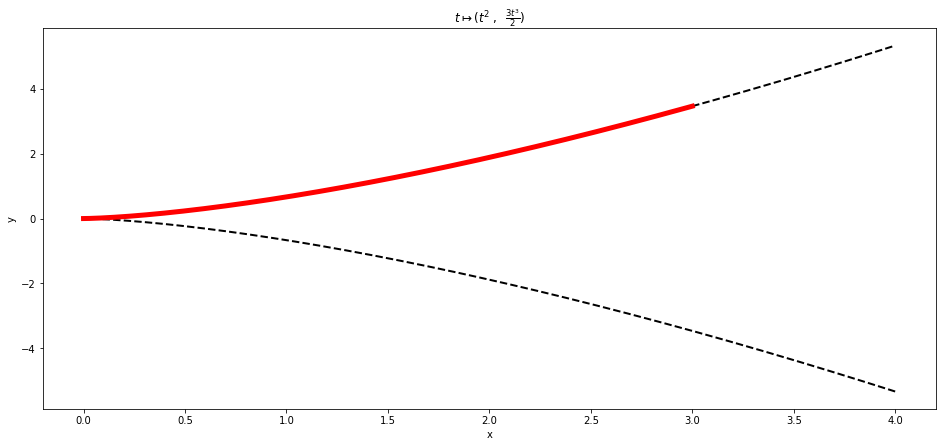

In [28]:
xy = lambda t: (t**2, 2*t**3/3)

plt.figure(figsize=(16,7))
plt.plot(*xy(np.linspace(-2, 2, 500)), "--k", linewidth=2)
plt.plot(*xy(np.linspace(0, np.sqrt(3), 500)), "r", linewidth=5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$t \\mapsto (t^2 \\;,\\;\\; \\frac{3 t^3}{2} )$");

<center>
<span style="font-size: 40pt; line-height: 100px;">
Vielen Dank
</span>
</center>

In [88]:
# Don't forget to save first                             --SlidesExporter.reveal_scroll=False
!jupyter nbconvert Tut07.ipynb --to slides --reveal-prefix ./../../../../reveal --SlidesExporter.reveal_theme=white 
!ls

[NbConvertApp] Converting notebook Tut07.ipynb to slides
[NbConvertApp] Writing 618637 bytes to Tut07.slides.html
1b.html  2.html  custom.css  Tut07.ipynb  Tut07.slides.html
